In [94]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:/Users/user/OneDrive/Рабочий стол/SuperMarket Analysis.csv")
df = df.drop_duplicates()
df = df.dropna()
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour




C:\Users\user\AppData\Local\Temp\ipykernel_4108\321031327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Sales', data=data1, palette='viridis')


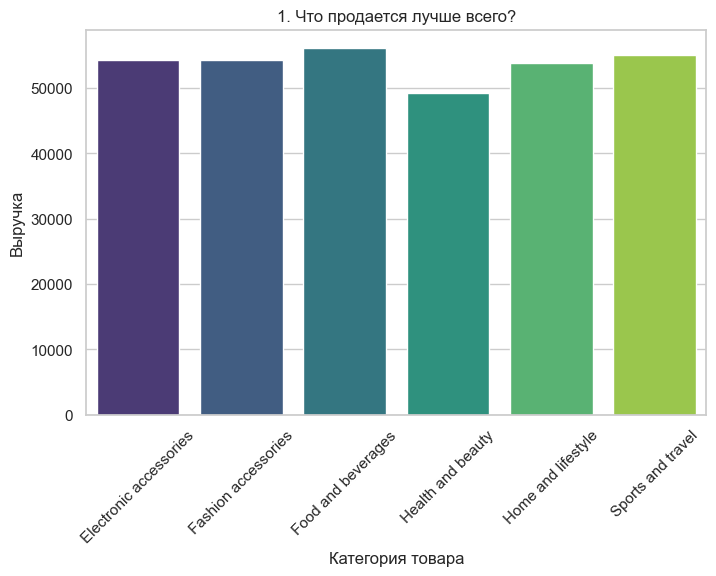

In [140]:
#Бизнес-задача: Анализ ассортимента и управление маржинальностью.
plt.figure(figsize=(8,5))
data1 = df.groupby('Product line')['Sales'].sum().reset_index()
sns.barplot(x='Product line', y='Sales', data=data1, palette='viridis')
plt.title('1. Что продается лучше всего?')
plt.xlabel('Категория товара')
plt.ylabel('Выручка')
plt.xticks(rotation=45) # Поворачиваем подписи
plt.show()

'''Инсайт: График показывает, какая товарная группа (Product line) является основой выручки.
Food and beverages" значит нельзя допускать пустых полок с едой'''

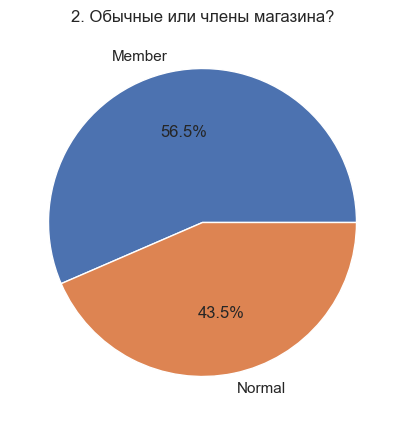

In [135]:
#Бизнес-задача: Оценка эффективности программы лояльности
plt.figure(figsize=(8,5))
data2 = df['Customer type'].value_counts()
plt.pie(data2, labels=data2.index, autopct='%1.1f%%')
plt.title('2. Обычные люди или члены магазина?')
plt.show()
'''Инсайт: Диаграмма показывает долю постоянных клиентов.
Если доля "Member" меньше 30-40%, значит теряется возможность удерживать клиентов и делать повторные продажи»'''

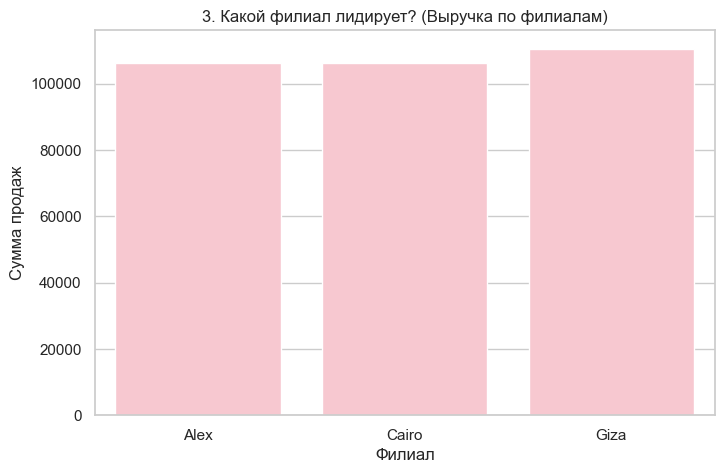

In [142]:
#Бизнес-задача:Сравнение филиалов и распределение ресурсов
plt.figure(figsize=(8,5))
data3 = df.groupby('Branch')['Sales'].sum().reset_index()
sns.barplot(x='Branch', y='Sales', data=data3, color='pink')
plt.title('3. Какой филиал лидирует? (Выручка по филиалам)')
plt.xlabel('Филиал')
plt.ylabel('Сумма продаж')
plt.show()
'''Инсайт: Мы видим какой филиал приносит больше всего денег в кассу.
примерно каждый филиал приносит выручку больше 100000'''

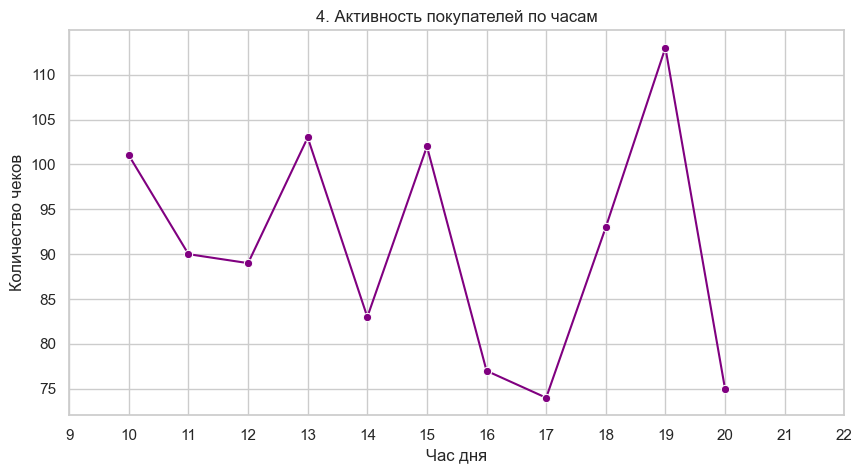

In [131]:
#Бизнес вопроc: В какое время большая загруженость? 
plt.figure(figsize=(10,5))
data4 = df.groupby('Hour')['Invoice ID'].count().reset_index()
sns.lineplot(x='Hour', y='Invoice ID', data=data4, marker='o', color='purple')
plt.title('4. Активность покупателей по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество чеков')
plt.xticks(range(9, 23)) 
plt.show()
#Инсайт: В какие часы все кассы должны работать и а какие можно отпускать персонал на обед 

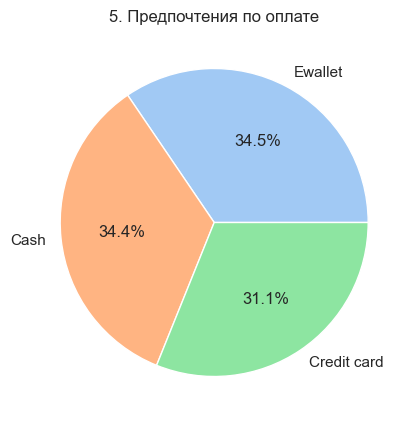

In [129]:
#Бизнес вопрос: Каким способами оплаты чаще всего пользуются?
plt.figure(figsize=(8, 5))
data5 = df['Payment'].value_counts()
plt.pie(data5, labels=data5.index, autopct='%1.1f%%', colors=colors)
plt.title('5. Предпочтения по оплате')
plt.show()
#Инсайт: Оплата происходит 3 видами и их процентное соотношение одинаковое


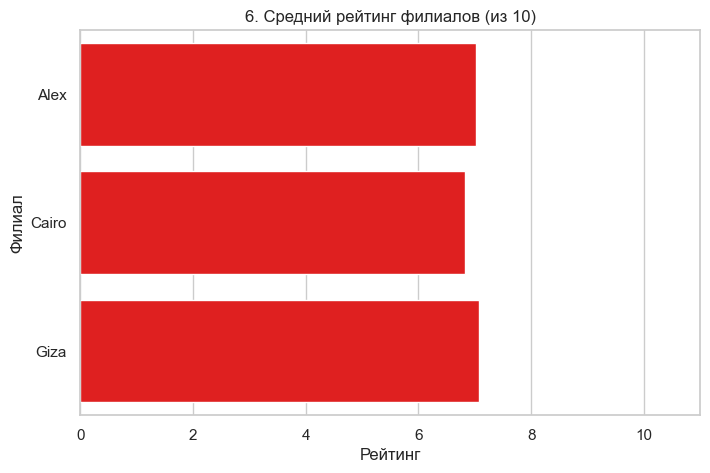

In [137]:
#Бизнес вопроc: Контроль качества 
plt.figure(figsize=(8,5))
data6 = df.groupby('Branch')['Rating'].mean().reset_index()
sns.barplot(x='Rating', y='Branch', data=data6, color='red')
plt.title('6. Средний рейтинг филиалов (из 10)')
plt.xlabel('Рейтинг')
plt.ylabel('Филиал')
plt.xlim(0, 11) 
plt.show()
#Инсайт: Мы видим что в каждом вилиле среднии рейтинг составляет 7, филиалам нужно улучшать свой рейтинг 